# **Exercícios de limpeza e tratamento de dados**

Projeto de limpeza feito com apoio em curso e correção.

Iniciação e primeira vizualização do dataset

In [ ]:
#Importação de libs
import pandas as pd
import seaborn as srn
import statistics as sts

In [ ]:
#nomeação do dataset
data = pd.read_csv("Churn.csv", sep=";")
data.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [ ]:
data.shape

(999, 12)

In [ ]:
#nomeação das colunas
data.columns = ["Id","Score","Estado","Genero","Idade","Patrimonio","Saldo",
                "Produtos","TemCartCredito","Ativo","Salario","Saiu"]

In [ ]:
data.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


Análise exploratória

In [ ]:
#visualização  da coluna estado
estadogroup = data.groupby(['Estado']).size()
estadogroup

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

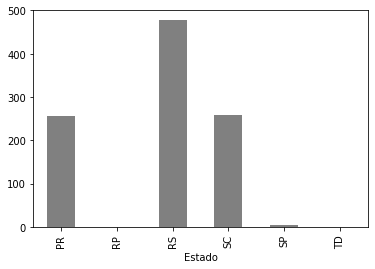

In [ ]:
estadogroup.plot.bar(color = 'grey')

In [ ]:
#visualização  da coluna Genero
generogroup = data.groupby(["Genero"]).size()
generogroup

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

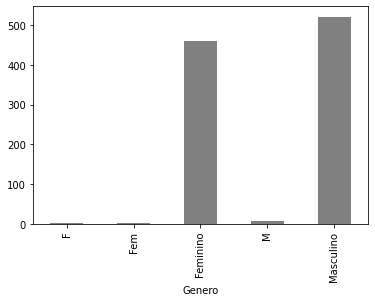

In [ ]:
generogroup.plot.bar(color = 'grey')

In [ ]:
#visualização  da coluna score
data['Score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Score')

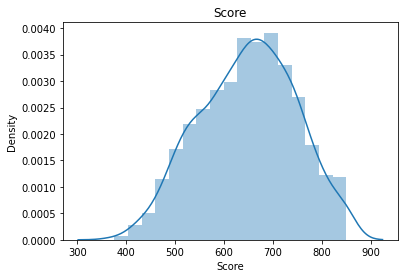

In [ ]:
srn.distplot(data['Score']).set_title('Score')

In [ ]:
#visualização  da coluna idade
data['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Idade')

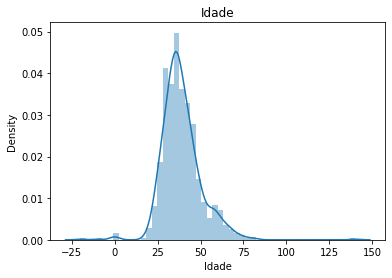

In [ ]:
srn.distplot(data['Idade']).set_title('Idade')

In [ ]:
#visualização  da coluna saldo
data['Saldo'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Saldo')

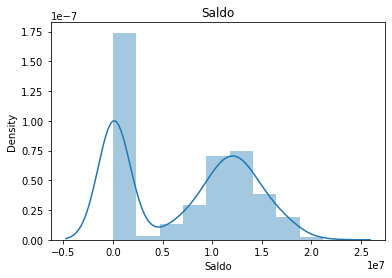

In [ ]:
srn.distplot(data['Saldo']).set_title('Saldo')

In [ ]:
#visualização  da coluna salario
data['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Salario')

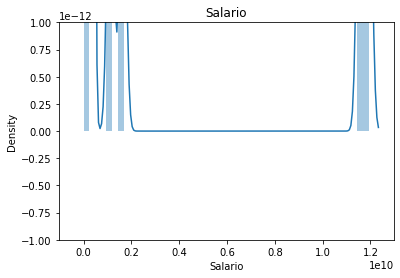

In [ ]:
srn.distplot(data['Salario']).set_title('Salario')

In [ ]:
#verificação se há valores nulos no dataset
data.isnull().sum()

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

In [ ]:
#Criação de mediana dos salários para substituir os nulos
medianasalario = sts.median(data['Salario'])
medianasalario

70518.0

In [ ]:
#preenchimento de registros null para mediana
data['Salario'].fillna(medianasalario, inplace = True)

In [ ]:
data['Salario'].isnull().sum()

0

In [ ]:
#verificação de null em genero
data['Genero'].isnull().sum()

8

In [ ]:
#preenchimento de registros null para masculino seguindo a maioria dos registros encontrados
data['Genero'].fillna('Masculino', inplace = True)

In [ ]:
data['Genero'].isnull().sum()

0

In [ ]:
#Substituição dos dados na coluna genero mantendo a padronização
data.loc[data['Genero'] == 'M', 'Genero'] = 'Masculino'
data.loc[data['Genero'].isin(['Fem','F']), 'Genero' ] = "Feminino"

In [ ]:
#verificando substituição dos registros
generogroup = data.groupby(["Genero"]).size()
generogroup

Genero
Feminino     464
Masculino    535
dtype: int64

In [ ]:
#verificando registros de idades fora do padrão
data.loc[(data['Idade'] <= 0) | (data['Idade'] >= 120)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
851,853,667,PR,Feminino,0,1,9713392,2,0,0,11331677.0,1
887,889,585,RS,Masculino,0,2,0,2,1,1,1865777.0,0
930,932,661,SC,Masculino,0,6,13262898,1,0,0,3881267.0,0
931,933,564,PR,Masculino,0,9,10352275,2,1,1,3433821.0,0
947,949,715,RS,Feminino,0,5,11859041,1,1,1,568417.0,1


In [ ]:
medianaidade = sts.median(data['Idade'])
medianaidade

37

In [ ]:
#substituindo as idades pela mediana
data.loc[(data['Idade'] <= 0) | (data['Idade'] >= 120)] = medianaidade

In [ ]:
#verificando a substituição
data.loc[(data['Idade'] <= 0) | (data['Idade'] >= 120)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [ ]:
#verificando dados duplicados
data[data.duplicated(['Id'], keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
36,37,490,SC,Masculino,31,3,14526023,1,0,1,11406677.0,0
851,37,37,37,37,37,37,37,37,37,37,37.0,37
887,37,37,37,37,37,37,37,37,37,37,37.0,37
930,37,37,37,37,37,37,37,37,37,37,37.0,37
931,37,37,37,37,37,37,37,37,37,37,37.0,37
947,37,37,37,37,37,37,37,37,37,37,37.0,37


In [ ]:
#excluindo dados duplicados
data.drop_duplicates(subset="Id", keep='first', inplace=True)

In [ ]:
#verificando duplicados
data[data.duplicated(['Id'], keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [ ]:
estadogroup = data.groupby(['Estado']).size()
estadogroup

Estado
PR    257
RP      1
RS    474
SC    258
SP      4
TD      1
dtype: int64

In [ ]:
#agregando dados de estado fora do eixo Sul para moda
data.loc[data['Estado'].isin(['RP','SP','TD']),'Estado'] = "RS"
estadogroup = data.groupby(['Estado']).size()
estadogroup

Estado
PR    257
RS    480
SC    258
dtype: int64

In [ ]:
#criando desvio padrão dos salários para substituição
salariodesv = sts.stdev(data['Salario'])
salariodesv

529784177.6096346

In [ ]:
#verificando dados que estão acima de 2 desvios
data.loc[data['Salario'] >= 2 * salariodesv]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [ ]:
#criando mediada de salários para substituição 
medianasalario = sts.median(data['Salario'])
medianasalario

8641028.0

In [ ]:
#substituindo e verificando substuição
data.loc[data['Salario']>= 2 * salariodesv, 'Salario'] = medianasalario
data.loc[data['Salario'] >= 2 * salariodesv]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [ ]:
data.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [ ]:
data.shape

(995, 12)

**Amostra de Gráficos pós limpeza**

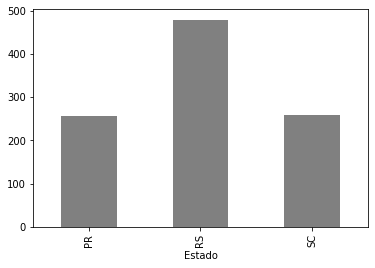

In [ ]:
estadogroup.plot.bar(color = 'grey')

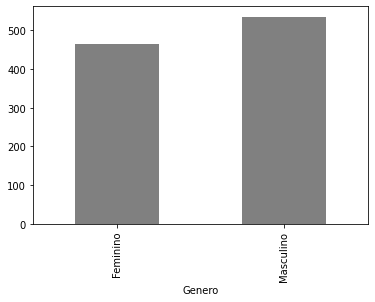

In [ ]:
generogroup.plot.bar(color = 'grey')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Score')

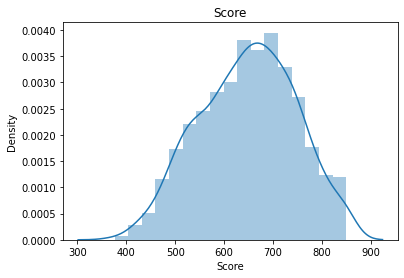

In [ ]:
srn.distplot(data['Score']).set_title('Score')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Idade')

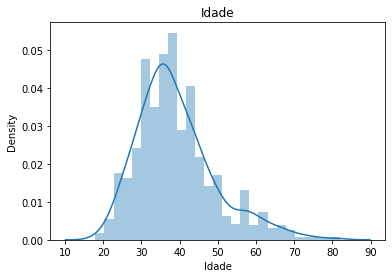

In [ ]:
srn.distplot(data['Idade']).set_title('Idade')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Saldo')

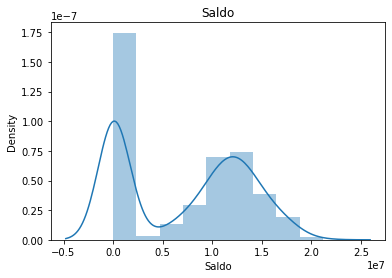

In [ ]:
srn.distplot(data['Saldo']).set_title('Saldo')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Salario')

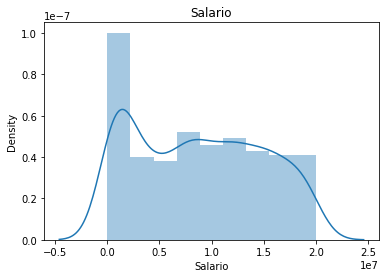

In [ ]:
srn.distplot(data['Salario']).set_title('Salario')